In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import os,sys
import h5py, json
import pickle as pkl
import time

import nept
sys.path.append('../PreProcessing/')
sys.path.append('../TrackingAnalyses/')
sys.path.append('../Lib/')
sys.path.append('../Analyses/')

from importlib import reload  # Python 3.4+ only.
import TrialAnalyses as TA
import zone_analyses_session as ZA
import analyses_table as AT

from matplotlib_venn import venn2,venn3

In [3]:
oakPaths = AT.getOakPaths()

In [3]:
TrialDat_Fn = oakPaths['Analyses'] / 'allAnimalsTrialDat.pkl'
with TrialDat_Fn.open(mode='rb') as f:
    allDat = pkl.load(f)

In [6]:
TA=reload(TA)
tasks = ['T3h','T3g','T3j','T3i']

#animals = ['Li','Cl','Ne']
animals = ['Cl','Ne']

overwriteSpikes = False
overwriteTrialDat=True
doPlots = False
#allDat = {}
for animal in animals:
    
    fn = oakPaths['Root'] / (animal+'_SessionPaths.pkl')
    with fn.open(mode="rb") as f:
        sePaths = pkl.load(f)
#     fn = oakPaths['Root'] / (animal+'_AnalysesTable.csv')
#     aTable = pd.read_csv(fn,index_col=0)

    CT_Path =  oakPaths['Clustered'] / animal / (animal+'_ClusteringSummary.json')
    TrialDat_Fn = oakPaths['Analyses'] / animal / ('{}_TrialAnalysesDat.pkl').format(animal)
    ZoneDat_Fn = oakPaths['Analyses'] / animal / ('{}_ZoneAnalysesDat.pkl').format(animal)
    with CT_Path.open() as f:
        CT = json.load(f)

    TrialDat = {}
    ZoneDat = {}
    SessionList = []
    cnt=0
    if (not TrialDat_Fn.exists())|True:
        for se,v in CT['Sessions'].items():
            if v:
                temp = se.split('_')
                if temp[1] in tasks:
                    try:
                        SessionList.append(se)
                        #ZoneDat[se]=ZA.zone_analyses(sePaths[se],overwriteSpikes=overwriteSpikes,doPlots=doPlots)
                        TrialDat[se]=TA.main(sePaths[se],overwrite=overwriteTrialDat,doPlots=doPlots)
                    except:
                        print("Error processing session: {}".format(se))
                        print ("Error", sys.exc_info()[0],sys.exc_info()[1],sys.exc_info()[2].tb_lineno)
                    cnt+=1

        TrialDat['Sessions'] = SessionList
        
        with TrialDat_Fn.open(mode='wb') as f:
            pkl.dump(TrialDat,f,pkl.HIGHEST_PROTOCOL)
        with ZoneDat_Fn.open(mode='wb') as f:
            pkl.dump(ZoneDat,f,pkl.HIGHEST_PROTOCOL)

    else:
        with TrialDat_Fn.open(mode='rb') as f:
            TrialDat = pkl.load(f)
    allDat[animal]=TrialDat

TrialDat_Fn = oakPaths['Analyses'] / 'allAnimalsTrialDat.pkl'
with TrialDat_Fn.open(mode='wb') as f:
    pkl.dump(allDat,f,pkl.HIGHEST_PROTOCOL)


Analyzing Trials from session Cl_T3g_010619
Loading FRs ...
FR Loaded.
Loading Beh Tracking Data
Complete.
Trial Info Dict does not exists. Computing.
Process Completed. Time 1.1715779304504395s
Trial x Condition Matrix Does Not Exist. Computing.
Process Completed. Time 0.3885996341705322s
Trial x Position Long Condition Matrix Does Not Exist. Computing.
Process Completed. Time 0.7216429710388184s
Trial x Position Long FiringRate Matrix Does Not Exist. Computing.
Process Completed Time 1.6584012508392334s
Trial Model Fits Does Not Exists. Computing

Analyzing cell 0

Computing mixedlm with formula: zFR ~ Loc:IO+Loc+IO+Cue+Sp+Co

Overall test R2: 0.395
Full Model Test Set Fit completed. Time = 0.5238478183746338
Full Model passed the threshold, looking for optimal submodel.


Fitting Completed for cell 0, total time = 17.556s

Computing mixedlm with formula: zFR ~ Loc:IO+Loc+IO

Overall test R2: 0.395
Selected Model = 31, AICc = 5028.906047668169, testR2 = 0.3948764380607484 

Analyzin

In [5]:
#allDat = {}
#allDat['Li'] = TrialDat

In [8]:
TrialDat_Fn = oakPaths['Analyses'] / 'allAnimalsTrialDat.pkl'
with TrialDat_Fn.open(mode='wb') as f:
    pkl.dump(allDat,f,pkl.HIGHEST_PROTOCOL)

In [204]:
allDat['Li']['Li_T3g_060118'][1]

,Cues,Desc,Co,Traj,OTraj,Dur,Good,Length,OLength
1,R,R,Co,NaN,NaN,1115,False,,
2,R,L,InCo,L_L3,L_S3,543,True,L,S
3,L,R,InCo,R_L1,NaN,569,True,L,
4,R,L,InCo,L_S4,L_S4,442,True,S,S
5,R,R,Co,NaN,R_S2,753,False,,S
6,L,L,Co,L_L3,L_S3,526,True,L,S
7,R,R,Co,R_S2,R_S2,362,True,S,S
8,L,L,Co,NaN,L_S4,425,False,,S
9,L,L,Co,L_S4,L_S4,368,True,S,S
10,L,R,InCo,R_S2,R_S2,380,True,S,S


In [42]:
modelFits = pd.DataFrame()
unFitSessions = []
missingSessions = []
for an in ['Li','Cl','Ne']:
    TD=allDat[an]
    for se in TD['Sessions']:
        if se in TD:
            d = TD[se][4]
            task = se.split('_')[1]
            if len(d)>0:
                nUnits = d.shape[0]
                d['se'] = [se]*nUnits
                d['an'] = [an]*nUnits
                d['task'] = [task]*nUnits
                modelFits = pd.concat([modelFits,d])
            else:
                unFitSessions.append(se)
        else:
            missingSessions.append(se)
mods = {}
params = TA.getParamSet(params=['Loc','IO','Cue','Sp','Co'])
for k,pp in params.items():
    s =''
    for p in pp:
        s+='-'+p
    mods[k]=s[1:]
selModels = []

for u in modelFits['modelNum']:
    if u>-1:
        selModels.append(mods[int(u)])
    else:
        selModels.append('UnCla')
modelFits['selMod'] = selModels

In [217]:
# behavioral
All_BehDat = pd.read_csv(oakPaths['Analyses'] / 'TaskBehavior.csv',index_col=0)
All_BehDat = All_BehDat.set_index('se')

In [69]:
sns.set(style="whitegrid",font_scale=1,rc={
    'axes.spines.bottom': False,
'axes.spines.left': False,
'axes.spines.right': False,
'axes.spines.top': False,
'axes.edgecolor':'0.5'})

sns.set_context("poster")
plotSP = Path('/mnt/c/Users/alexg8/Documents/SfN2019/Plots/')

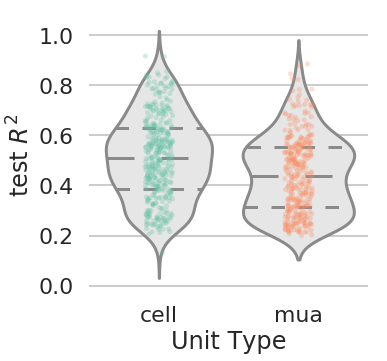

In [190]:
f,ax=plt.subplots(figsize=(5,5))
ax=sns.violinplot(y='testR2',x='ut',dodge=True,data=modelFits,color='0.9',inner='quartile',ax=ax)
ax=sns.stripplot(y='testR2',x='ut',data=modelFits,palette='Set2',alpha=0.3)
ax.set_xlabel('Unit Type')
ax.set_ylabel('test $R^2$')
f.savefig(plotSP / 'SingCellTrialModsR2.svg', bbox_inches='tight', pad_inches=0.2)


No handles with labels found to put in legend.


Text(0.5, 1.0, ' r=0.16, p=0.04 ')

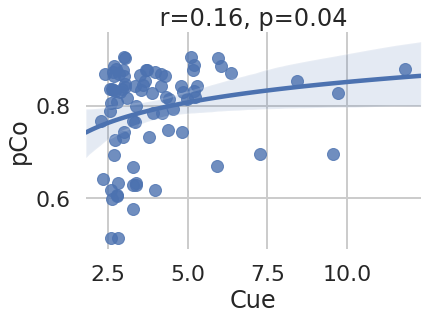

In [350]:
x = modelFits[['Cue','se','an','ut','task','selMod']]
x=x.dropna()
x=x.reset_index()
x['pCo'] = 0
x['pCoST'] = 0
for i,se in enumerate(x['se']):
    x.loc[i,'pCo'] = All_BehDat.loc[se,'pCo']
    x.loc[i,'pCoST'] = All_BehDat.loc[se,'pCoST']
x = x.groupby(['se','ut','an','task']).mean()
x=x.reset_index()
f,ax=plt.subplots()
ax=sns.regplot(x='Cue',y='pCo',data=x,logx=True,ax=ax)#palette='Set2')
ax.legend().remove()
r,p = stats.kendalltau(x['Cue'],x['pCo'])
ax.set_title(' r={0:0.2f}, p={1:0.2f} '.format(r,p))
#f.savefig(plotSP / 'CueCoeff_SePerf.svg', bbox_inches='tight', pad_inches=0.2)


In [353]:
x = modelFits[['Cue','se','an','ut','task','selMod']]
x=x.dropna()
x=x.reset_index()
x['pCo'] = 0
x['pCoST'] = 0
for i,se in enumerate(x['se']):
    x.loc[i,'pCo'] = All_BehDat.loc[se,'pCo']
    x.loc[i,'pCoST'] = All_BehDat.loc[se,'pCoST']
x

,index,Cue,se,an,ut,task,selMod,pCo,pCoST
0,2,3.019583,Li_T3g_052918,Li,cell,T3g,Loc:IO-Loc-IO-Cue-Co,0.863636,0.862745
1,4,3.162453,Li_T3g_053118,Li,cell,T3g,Loc:IO-Loc-IO-Cue-Co,0.792857,0.840580
2,5,4.363764,Li_T3g_053118,Li,cell,T3g,Loc:IO-Loc-IO-Cue-Co,0.792857,0.840580
3,6,5.819836,Li_T3g_053118,Li,cell,T3g,Loc:IO-Loc-IO-Cue-Co,0.792857,0.840580
4,8,4.781016,Li_T3g_053118,Li,cell,T3g,Loc:IO-Loc-IO-Cue-Sp-Co,0.792857,0.840580
5,1,4.415039,Li_T3g_060118,Li,cell,T3g,Loc:IO-Loc-IO-Cue-Co,0.842767,0.857143
6,2,4.840455,Li_T3g_060118,Li,cell,T3g,Loc:IO-Loc-IO-Cue,0.842767,0.857143
7,3,4.545063,Li_T3g_060118,Li,cell,T3g,Loc:IO-Loc-IO-Cue-Sp-Co,0.842767,0.857143
8,8,2.927289,Li_T3g_060118,Li,cell,T3g,Loc:IO-Loc-IO-Cue,0.842767,0.857143
9,15,5.197159,Li_T3g_060118,Li,mua,T3g,Loc:IO-Loc-IO-Cue,0.842767,0.857143


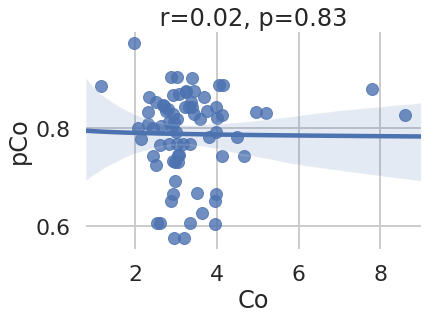

In [319]:
x = modelFits[['Co','se','an','ut','task','selMod']]
x=x.dropna()
x=x.reset_index()
x['pCo'] = 0
x['pCoST'] = 0
for i,se in enumerate(x['se']):
    x.loc[i,'pCo'] = All_BehDat.loc[se,'pCo']
    x.loc[i,'pCoST'] = All_BehDat.loc[se,'pCoST']
x = x.groupby(['se','ut','an','task']).mean()
x=x.reset_index()
#ax=sns.scatterplot(x='Co',y='pCo',hue='ut',data=x,palette='Set2',alpha=0.7)
#ax.legend().remove()
f,ax=plt.subplots()
ax=sns.regplot(x='Co',y='pCo',data=x,logx=True,ax=ax)#
r,p = stats.kendalltau(x['Co'],x['pCo'])
ax.set_title(' r={0:0.2f}, p={1:0.2f} '.format(r,p))
f.savefig(plotSP / 'CoCoeff_SePerf.svg', bbox_inches='tight', pad_inches=0.2)


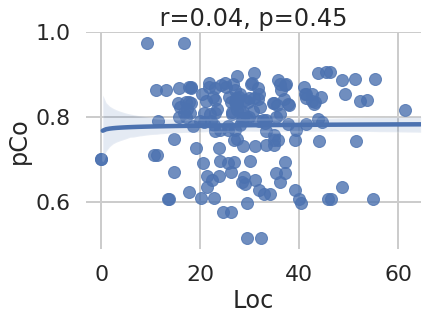

In [318]:
x = modelFits[['Loc','se','an','ut','task','selMod']]
x[x['Loc']>100]=np.nan
x=x.dropna()
x=x.reset_index()
x['pCo'] = 0
x['pCoST'] = 0
for i,se in enumerate(x['se']):
    x.loc[i,'pCo'] = All_BehDat.loc[se,'pCo']
    x.loc[i,'pCoST'] = All_BehDat.loc[se,'pCoST']
x = x.groupby(['se','ut','an','task']).mean()
x=x.reset_index()
#ax=sns.scatterplot(x='Co',y='pCo',hue='ut',data=x,palette='Set2',alpha=0.7)
#ax.legend().remove()
f,ax=plt.subplots()
ax=sns.regplot(x='Loc',y='pCo',data=x,logx=True,ax=ax)#
r,p = stats.kendalltau(x['Loc'],x['pCo'])
ax.set_title(' r={0:0.2f}, p={1:0.2f} '.format(r,p))
f.savefig(plotSP / 'LocCoeff_SePerf.svg', bbox_inches='tight', pad_inches=0.2)


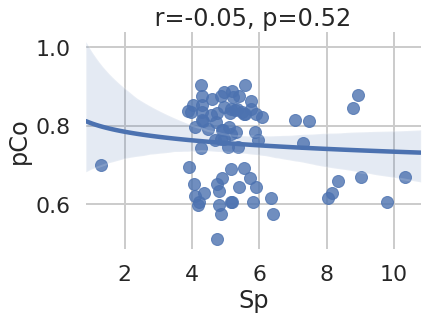

In [322]:
x = modelFits[['Sp','se','an','ut','task','selMod']]
x=x.dropna()
x=x.reset_index()
x['pCo'] = 0
x['pCoST'] = 0
for i,se in enumerate(x['se']):
    x.loc[i,'pCo'] = All_BehDat.loc[se,'pCo']
    x.loc[i,'pCoST'] = All_BehDat.loc[se,'pCoST']
x = x.groupby(['se','ut','an','task']).mean()
x=x.reset_index()
#ax=sns.scatterplot(x='Co',y='pCo',hue='ut',data=x,palette='Set2',alpha=0.7)
#ax.legend().remove()
f,ax=plt.subplots()
ax=sns.regplot(x='Sp',y='pCo',data=x,logx=True,ax=ax)#
r,p = stats.kendalltau(x['Sp'],x['pCo'])
ax.set_title(' r={0:0.2f}, p={1:0.2f} '.format(r,p))
f.savefig(plotSP / 'SpCoeff_SePerf.svg', bbox_inches='tight', pad_inches=0.2)


In [232]:
x = modelFits[['Co','se','an','ut','task','selMod']]
x=x.dropna()
x=x.reset_index()
x['pCo'] = 0
x['pCoST'] = 0
for i,se in enumerate(x['se']):
    x.loc[i,'pCo'] = All_BehDat.loc[se,'pCo']
    x.loc[i,'pCoST'] = All_BehDat.loc[se,'pCoST']
ax=sns.scatterplot(x='Co',y='pCo',hue='ut',data=x,palette='Set2',alpha=0.7)
ax.legend().remove()

,index,Cue,se,an,ut,selMod,pCo
0,2,3.019583,Li_T3g_052918,Li,cell,Loc:IO-Loc-IO-Cue-Co,0.863636
1,4,3.162453,Li_T3g_053118,Li,cell,Loc:IO-Loc-IO-Cue-Co,0.792857
2,5,4.363764,Li_T3g_053118,Li,cell,Loc:IO-Loc-IO-Cue-Co,0.792857
3,6,5.819836,Li_T3g_053118,Li,cell,Loc:IO-Loc-IO-Cue-Co,0.792857
4,8,4.781016,Li_T3g_053118,Li,cell,Loc:IO-Loc-IO-Cue-Sp-Co,0.792857
5,1,4.415039,Li_T3g_060118,Li,cell,Loc:IO-Loc-IO-Cue-Co,0.842767
6,2,4.840455,Li_T3g_060118,Li,cell,Loc:IO-Loc-IO-Cue,0.842767
7,3,4.545063,Li_T3g_060118,Li,cell,Loc:IO-Loc-IO-Cue-Sp-Co,0.842767
8,8,2.927289,Li_T3g_060118,Li,cell,Loc:IO-Loc-IO-Cue,0.842767
9,15,5.197159,Li_T3g_060118,Li,mua,Loc:IO-Loc-IO-Cue,0.842767


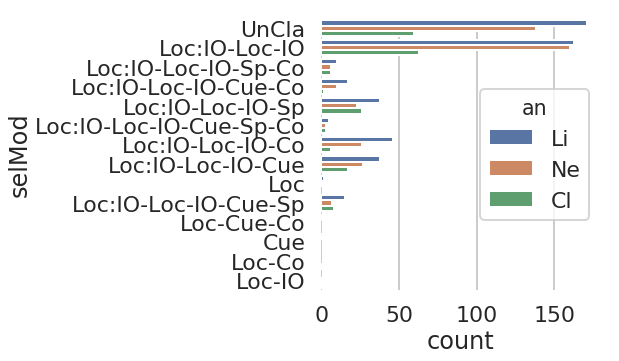

In [94]:
f,ax=plt.subplots(figsize=(5,5))
sns.countplot(y='selMod',hue='an',data=modelFits,hue_order=['Li','Ne','Cl'])

Text(0, 0.5, 'Selected Model')

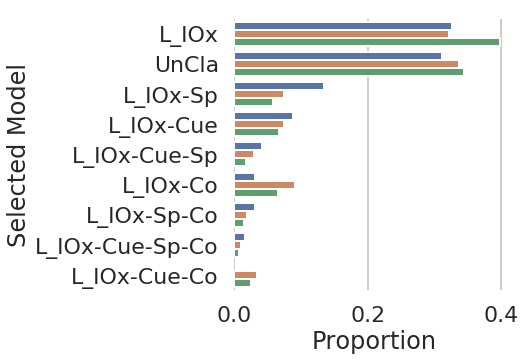

In [175]:
f,ax=plt.subplots(figsize=(5,5))
prop_df = (modelFits['selMod']
           .groupby(modelFits['an'])
           .value_counts(normalize=True)
           .rename('prop')
           .reset_index())
counts_df = (modelFits['selMod']
           .groupby(modelFits['an'])
           .value_counts()
           .rename('counts')
           .reset_index())

#sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])
ax=sns.barplot(y='selMod',x='prop',hue='an',data=prop_df[counts_df['counts']>2])
ax.legend().remove()
ytl = []
for ii in ax.get_yticklabels():
    ytl.append( ii.get_text() )
ytl2 = []
for i in ytl:
    if 'Loc:IO-Loc-IO' in i:
        ytl2.append( 'L_IOx'+i[13:])
    else:
        ytl2.append(i)

ax.set_yticklabels(ytl2)
ax.set_xlabel('Proportion')
ax.set_ylabel('Selected Model')
#f.savefig(plotSP / 'TrialModDistribution.svg', bbox_inches='tight', pad_inches=0.2)


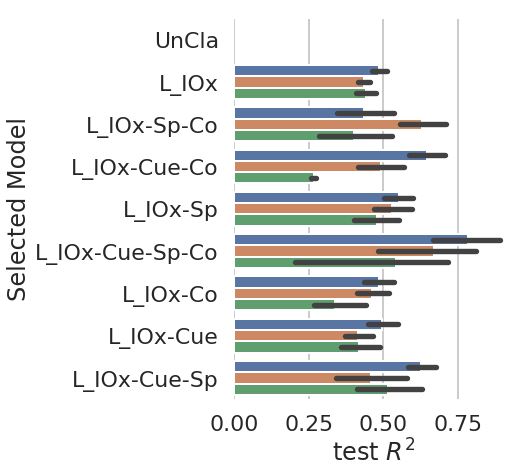

In [188]:
f,ax=plt.subplots(figsize=(5,7))
retainIDx = np.zeros(len(modelFits['selMod'] ),dtype=bool)
for i,mod in enumerate(modelFits['selMod']):
    if mod in ytl:
        retainIDx[i]=True
        
ax=sns.barplot(y='selMod',x='testR2',hue='an',data=modelFits[retainIDx],ax=ax,hue_order=['Li','Ne','Cl'])
ytl = []
for ii in ax.get_yticklabels():
    ytl.append( ii.get_text() )
ytl2 = []
for i in ytl:
    if 'Loc:IO-Loc-IO' in i:
        ytl2.append( 'L_IOx'+i[13:])
    else:
        ytl2.append(i)
ax.set_yticklabels(ytl2)
ax.set_ylabel('Selected Model')
ax.set_xlabel('test $R^2$')
ax.legend().remove()
f.savefig(plotSP / 'TrialModTestR2.svg', bbox_inches='tight', pad_inches=0.2)


In [179]:
ii,mod

(Text(0, 8, 'L_IOx-Cue-Co'), 'UnCla')

'Cue-Co'

In [18]:
nCells = modelFits.shape[0]
print(pd.Series(selModels).value_counts()/nCells*100)
print(pd.Series(selModels).value_counts())

Loc:IO-Loc-IO              35.027223
UnCla                      33.484574
Loc:IO-Loc-IO-Sp            7.894737
Loc:IO-Loc-IO-Cue           7.441016
Loc:IO-Loc-IO-Co            7.078040
Loc:IO-Loc-IO-Cue-Sp        2.722323
Loc:IO-Loc-IO-Cue-Co        2.631579
Loc:IO-Loc-IO-Sp-Co         1.996370
Loc:IO-Loc-IO-Cue-Sp-Co     0.998185
Loc                         0.272232
Loc-IO                      0.181488
Loc-Co                      0.090744
Loc-Cue-Co                  0.090744
Cue                         0.090744
dtype: float64

In [77]:
sub1= modelFits['task']=='T3g'
sub2=modelFits['task']=='T3i'
print(pd.Series(modelFits[sub1]['selMod']).value_counts())
print()
print(pd.Series(modelFits[sub2]['selMod']).value_counts())

Loc:IO-Loc-IO              339
UnCla                      312
Loc:IO-Loc-IO-Co            75
Loc:IO-Loc-IO-Cue           69
Loc:IO-Loc-IO-Sp            54
Loc:IO-Loc-IO-Cue-Co        27
Loc:IO-Loc-IO-Cue-Sp        23
Loc:IO-Loc-IO-Sp-Co         17
Loc:IO-Loc-IO-Cue-Sp-Co      9
Loc                          3
Loc-IO                       2
Loc-Co                       1
Loc-Cue-Co                   1
Name: selMod, dtype: int64

UnCla                      57
Loc:IO-Loc-IO              44
Loc:IO-Loc-IO-Sp           33
Loc:IO-Loc-IO-Cue          13
Loc:IO-Loc-IO-Cue-Sp        7
Loc:IO-Loc-IO-Sp-Co         5
Loc:IO-Loc-IO-Co            3
Loc:IO-Loc-IO-Cue-Sp-Co     2
Loc:IO-Loc-IO-Cue-Co        2
Cue                         1
Name: selMod, dtype: int64


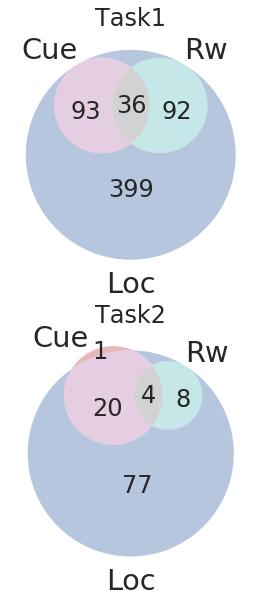

In [145]:

f,ax = plt.subplots(2,1,figsize=(12,10))
cnt=0
taskNames = ['Task1','Task2']
for t in ['T3g','T3i']:
    sub1= modelFits['task']==t
    selModels2=modelFits[sub1]['selMod']

    CueCells = set([i for i,v in enumerate(selModels2) if 'Cue' in v])
    CoCells = set([i for i,v in enumerate(selModels2) if 'Co' in v])
    LocCells = set([i for i,v in enumerate(selModels2) if 'Loc' in v])
    RwCells = set([i for i,v in enumerate(selModels2) if (('Co' in v)&('IO' in v) )])
    IOCells = set([i for i,v in enumerate(selModels2) if 'IO' in v])
    
    _=venn3([ CueCells, RwCells, LocCells],set_labels=['Cue','Rw','Loc'],ax=ax[cnt])
    ax[cnt].set_title(taskNames[cnt])
    cnt+=1
f.savefig(plotSP / 'UnitVennSelMods.svg', bbox_inches='tight', pad_inches=0.2)

In [90]:
modelFits['an'].value_counts()

Li    507
Ne    402
Cl    193
Name: an, dtype: int64

In [336]:
modelFits2 = modelFits.copy()
modelFits2['pCo'] = np.nan
modelFits2['pCoST'] = np.nan
modelFits2 = modelFits2.reset_index()
for i,se in enumerate(modelFits2['se']):
    try:
        modelFits2.loc[i,'pCo'] = All_BehDat.loc[se,'pCo']
        modelFits2.loc[i,'pCoST'] = All_BehDat.loc[se,'pCoST']
    except:
        pass

In [339]:
modelFits2.corr(method='kendall')

,index,FullMod_tR2,modelNum,trainR2,AICc,testR2,Loc:IO,Loc,IO,Cue,Sp,Co,pCo,pCoST
index,1.000000,-0.048554,-0.042364,-0.029582,0.006871,-0.016725,-0.025371,0.003489,0.090535,0.020372,-0.101205,0.013911,0.011609,-0.046385
FullMod_tR2,-0.048554,1.000000,0.130388,0.654120,-0.130283,0.953354,0.386261,0.482836,0.237153,0.130125,0.139687,0.221656,-0.053256,-0.065855
modelNum,-0.042364,0.130388,1.000000,0.077850,0.104359,0.120941,0.124207,0.089783,-0.006429,0.125425,-0.080242,0.225612,0.011095,-0.035777
trainR2,-0.029582,0.654120,0.077850,1.000000,-0.224126,0.666860,0.326075,0.435653,0.233432,0.031831,0.113915,0.103386,-0.020149,-0.020954
AICc,0.006871,-0.130283,0.104359,-0.224126,1.000000,-0.140384,0.206434,0.124462,0.105195,0.102623,-0.009933,0.143143,0.130399,0.090758
testR2,-0.016725,0.953354,0.120941,0.666860,-0.140384,1.000000,0.374326,0.472656,0.234925,0.125032,0.160089,0.218260,-0.023288,-0.056239
Loc:IO,-0.025371,0.386261,0.124207,0.326075,0.206434,0.374326,1.000000,0.481284,0.366690,0.128093,-0.029262,0.210483,0.045441,0.030294
Loc,0.003489,0.482836,0.089783,0.435653,0.124462,0.472656,0.481284,1.000000,0.276552,0.051428,-0.001163,0.239237,0.034121,-0.005617
IO,0.090535,0.237153,-0.006429,0.233432,0.105195,0.234925,0.366690,0.276552,1.000000,0.046009,0.091186,0.171223,0.014001,-0.001597
Cue,0.020372,0.130125,0.125425,0.031831,0.102623,0.125032,0.128093,0.051428,0.046009,1.000000,-0.021951,0.109756,0.138160,0.090685


In [349]:
import statsmodels.formula.api as smf
dat =[]
dat = modelFits2[~modelFits2['modelNum'].isnull()]
md =smf.mixedlm('pCoST~0+ut+testR2+selMod+task',data=dat,groups=dat['an'])
mdf = md.fit()
print(mdf.summary())
mdf.wald_test_terms()

                    Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        pCoST   
No. Observations:          733            Method:                    REML    
No. Groups:                3              Scale:                     0.0045  
Min. group size:           133            Likelihood:                888.8800
Max. group size:           336            Converged:                 Yes     
Mean group size:           244.3                                             
-----------------------------------------------------------------------------
                                  Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------
ut[cell]                           0.727    0.075   9.705 0.000  0.580  0.874
ut[mua]                            0.726    0.075   9.719 0.000  0.580  0.873
selMod[T.Loc]                      0.122    0.078   1.567 0.117 -0.031  0.275
selMod

<class 'statsmodels.stats.contrast.WaldTestResults'>
               chi2                   P>chi2  df constraint
ut        94.485980   3.0382956221602446e-21              2
selMod    17.634437       0.1272494971622139             12
task    1315.088233  2.7053195918628607e-286              2
testR2     0.014403       0.9044746825870289              1

In [183]:
mdf.wald_test_terms()

<class 'statsmodels.stats.contrast.WaldTestResults'>
                chi2                 P>chi2  df constraint
Intercept   2.798684    0.09434173258934204              1
ut         13.212694  0.0002780594312808363              1
selMod     23.407869   0.005342461553886505              9

In [ ]:
TrInfo,TrCondMat,TrLongMat,TrFRData, TrModFits

In [169]:
savePath = Path('/mnt/c/Users/alexg8/Documents/Data/Plots/TrialModelAnalyses/')
for an in ['Li','Cl']:
    TD=allDat[an]
    for se in TD['Sessions']:
        if se in TD:
            fitTable = TD[se][4]
            if isinstance(fitTable,pd.core.frame.DataFrame):
                nUnits = fitTable.shape[0]
                x=[]
                for i in np.arange(nUnits):
                    if np.isnan(fitTable['modelNum'][i]):
                        x.append('UnCla')
                    else:
                        x.append(mods[fitTable['modelNum'][i]])
                fitTable['selMod'] = x
                fitTable['se'] = [se]*nUnits
                frDat = TD[se][3]
                trDat = TD[se][2]
                plotLinearTraj2(frDat,trDat,fitTable,savePath)
                plotTrialConds2(frDat,trDat,fitTable,savePath)
               # break
    #break
    

{'cell': 4, 'mua': 12}
cell 1 1 Loc:IO-Loc-IO 0.2813405740553236 Li_T3g_052818

Plotting cell 1 Loc:IO-Loc-IO
mua 2 6 Loc:IO-Loc-IO 0.2420931048052301 Li_T3g_052818

Plotting mua 2 Loc:IO-Loc-IO
mua 3 7 Loc:IO-Loc-IO 0.25864633347896265 Li_T3g_052818

Plotting mua 3 Loc:IO-Loc-IO
mua 7 11 Loc:IO-Loc-IO-Desc 0.30284353438924627 Li_T3g_052818

Plotting mua 7 Loc:IO-Loc-IO-Desc
mua 8 12 Loc:IO-Loc-IO 0.24208525809221537 Li_T3g_052818

Plotting mua 8 Loc:IO-Loc-IO
mua 9 13 Loc:IO-Loc-IO 0.27309447306158796 Li_T3g_052818

Plotting mua 9 Loc:IO-Loc-IO
cell 1 1 Loc:IO-Loc-IO 0.2813405740553236 Li_T3g_052818

Plotting cell 1 Loc:IO-Loc-IO
mua 2 6 Loc:IO-Loc-IO 0.2420931048052301 Li_T3g_052818

Plotting mua 2 Loc:IO-Loc-IO
mua 3 7 Loc:IO-Loc-IO 0.25864633347896265 Li_T3g_052818

Plotting mua 3 Loc:IO-Loc-IO
mua 7 11 Loc:IO-Loc-IO-Desc 0.30284353438924627 Li_T3g_052818

Plotting mua 7 Loc:IO-Loc-IO-Desc
mua 8 12 Loc:IO-Loc-IO 0.24208525809221537 Li_T3g_052818

Plotting mua 8 Loc:IO-Loc-IO
mua 9 

In [134]:
fitTable

,ut,FullMod_tR2,modelNum,trainR2,AICc,testR2,Loc:IO,Loc,IO,Cue,Desc,Co,se,an,selMod
0,cell,0.037447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla
1,cell,0.236803,31.0,0.510432,1268.457089,0.281341,12.897559,11.169126,5.784192,NaN,NaN,NaN,Li_T3g_052818,Li,Loc:IO-Loc-IO
2,cell,0.110581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla
3,cell,0.176133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla
4,mua,0.076721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla
5,mua,0.090166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla
6,mua,0.230364,31.0,0.462369,1287.988538,0.242093,14.447389,14.455309,3.517020,NaN,NaN,NaN,Li_T3g_052818,Li,Loc:IO-Loc-IO
7,mua,0.242430,31.0,0.488156,1215.940284,0.258646,12.140533,13.626188,4.826825,NaN,NaN,NaN,Li_T3g_052818,Li,Loc:IO-Loc-IO
8,mua,0.024942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla
9,mua,0.102820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Li_T3g_052818,Li,UnCla


In [158]:
def plotLinearTraj2(frDat,trDat,fitTable,savePath):

    cellColIDs =  [i for i,item in enumerate(frDat.columns.values) if 'cell' in item]
    nCells = len(cellColIDs)
    muaColIDs =  [i for i,item in enumerate(frDat.columns.values) if 'mua' in item]
    nMua = len(muaColIDs)
    nTotalUnits = nCells+nMua
    nUnits = {'cell':nCells,'mua':nMua}
    print(nUnits)
    cellCols = frDat.columns[cellColIDs]
    muaCols = frDat.columns[muaColIDs]
    unitCols = {'cell':cellCols,'mua':muaCols}

    nMaxPos = 11
    nMinPos = 7
    plotAll = False
    
    sns.set()
    sns.set(style="whitegrid",context='notebook',font_scale=1.5,rc={
        'axes.spines.bottom': False,
        'axes.spines.left': False,
        'axes.spines.right': False,
        'axes.spines.top': False,
        'axes.edgecolor':'0.5'})

    pal = sns.xkcd_palette(['green','purple'])

    cellDat = trDat.copy()
    c_cnt = -1
    for ut in ['cell','mua']:
        for cell in np.arange(nUnits[ut]):
            c_cnt+=1
            if fitTable['selMod'].iloc[c_cnt]!='UnCla':
                sm = fitTable['selMod'].iloc[c_cnt]
                tR2 = fitTable['testR2'].iloc[c_cnt]
                se = fitTable['se'].iloc[c_cnt]
                print(ut,cell,c_cnt,sm,tR2,se)
                
                print('\nPlotting {} {} {}'.format(ut,cell,sm))
    
                cellDat.loc[:,'zFR'] = frDat[unitCols[ut][cell]]

                f,ax = plt.subplots(2,3, figsize=(15,6))
                w = 0.25
                h = 0.43
                ratio = 6.5/10.5
                hsp = 0.05
                vsp = 0.05
                W = [w,w*ratio,w*ratio]
                yPos = [vsp,2*vsp+h]
                xPos = [hsp,1.5*hsp+W[0],2.5*hsp+W[1]+W[0]]
                xlims = [[-0.25,10.25],[3.75,10.25],[-0.25,6.25]]
                for i in [0,1]:
                    for j in np.arange(3):
                        ax[i][j].set_position([xPos[j],yPos[i],W[j],h])
                        ax[i][j].set_xlim(xlims[j])

                xPosLabels = {}
                xPosLabels[0] = ['Home','SegA','Center','SegBE','Int','CDFG','Goals','CDFG','Int','CDFG','Goals']
                xPosLabels[2] = ['Home','SegA','Center','SegBE','Int','CDFG','Goals']
                xPosLabels[1] = xPosLabels[2][::-1]

                alpha=0.15
                mlw = 1
                with sns.color_palette(pal):
                    coSets = ['InCo','Co']
                    for i in [0,1]:
                        if i==0:
                            leg=False
                        else:
                            leg='brief'

                        if plotAll:
                            subset = (cellDat['IO']=='Out') & (cellDat['Co']==coSets[i]) & (cellDat['Valid'])
                            ax[i][0] = sns.lineplot(x='Pos',y='zFR',hue='Cue',style='Goal',ci=None,data=cellDat[subset],
                                     ax=ax[i][0],legend=False,lw=3,hue_order=['L','R'],style_order=['1','2','3','4'])
                            ax[i][0] = sns.lineplot(x='Pos',y='zFR',hue='Desc',estimator=None,units='trID',data=cellDat[subset],
                                    ax=ax[i][0],legend=False,lw=mlw,alpha=alpha,hue_order=['L','R'])

                            subset = (cellDat['IO']=='In') & (cellDat['Co']==coSets[i]) & (cellDat['Pos']>=4) & (cellDat['Valid'])
                            ax[i][1] = sns.lineplot(x='Pos',y='zFR',hue='Cue',style='Goal',ci=None,data=cellDat[subset],
                                     ax=ax[i][1],legend=False,lw=3,hue_order=['L','R'],style_order=['1','2','3','4'])
                            ax[i][1] = sns.lineplot(x='Pos',y='zFR',hue='Cue',estimator=None,units='trID',data=cellDat[subset],
                                    ax=ax[i][1],legend=False,lw=mlw,alpha=alpha,hue_order=['L','R'])

                            subset = (cellDat['IO']=='O_I') & (cellDat['Co']==coSets[i])& (cellDat['Valid'])
                            ax[i][2] = sns.lineplot(x='Pos',y='zFR',hue='Cue',style='Goal',ci=None,data=cellDat[subset],
                                        ax=ax[i][2],legend=leg,lw=3,hue_order=['L','R'],style_order=['1','2','3','4'])
                            ax[i][2] = sns.lineplot(x='Pos',y='zFR',hue='Cue',estimator=None,units='trID',data=cellDat[subset],
                                         ax=ax[i][2],legend=False,lw=mlw,alpha=alpha,hue_order=['L','R'])

                        else:
                            subset = (cellDat['IO']=='Out') & (cellDat['Co']==coSets[i]) & (cellDat['Valid'])
                            ax[i][0] = sns.lineplot(x='Pos',y='zFR',hue='Cue',style='Goal',data=cellDat[subset],
                                                  ax=ax[i][0],lw=2,legend=False,hue_order=['L','R'],style_order=['1','2','3','4'])
                            subset = (cellDat['IO']=='In') & (cellDat['Co']==coSets[i]) & (cellDat['Pos']>=4) & (cellDat['Valid'])
                            ax[i][1] = sns.lineplot(x='Pos',y='zFR',hue='Cue',style='Goal',data=cellDat[subset],
                                                 ax=ax[i][1],lw=2,legend=False,hue_order=['L','R'],style_order=['1','2','3','4'])
                            subset = (cellDat['IO']=='O_I') & (cellDat['Co']==coSets[i])& (cellDat['Valid'])
                            ax[i][2] = sns.lineplot(x='Pos',y='zFR',hue='Cue',style='Goal',data=cellDat[subset],
                                                 ax=ax[i][2],legend=leg,lw=2,hue_order=['L','R'],style_order=['1','2','3','4'])

                        ax[i][1].set_xticks(np.arange(4,nMaxPos))
                        ax[i][0].set_xticks(np.arange(nMaxPos))
                        ax[i][2].set_xticks(np.arange(nMinPos))

                        for j in np.arange(3):
                            ax[i][j].set_xlabel('')
                            ax[i][j].set_ylabel('')
                            ax[i][j].tick_params(axis='x', rotation=60)

                        ax[i][0].set_ylabel('{} zFR'.format(coSets[i]))
                        ax[i][1].set_yticklabels('')

                        if i==0:
                            for j in np.arange(3):
                                ax[i][j].set_xticklabels(xPosLabels[j])
                        else:
                            ax[i][0].set_title('Out')
                            ax[i][1].set_title('In')
                            ax[i][2].set_title('O-I')
                            for j in np.arange(3):
                                ax[i][j].set_xticklabels('')
                    l =ax[1][2].get_legend()
                    plt.legend(bbox_to_anchor=(1.05, 0), loc=6, borderaxespad=0.,frameon=False)
                    l.set_frame_on(False)

                    # out/in limits
                    lims = np.zeros((4,2))
                    cnt =0
                    for i in [0,1]:
                        for j in [0,1]:
                            lims[cnt]=np.array(ax[i][j].get_ylim())
                            cnt+=1
                    minY = np.floor(np.min(lims[:,0])*20)/20
                    maxY = np.ceil(np.max(lims[:,1]*20))/20
                    for i in [0,1]:
                        for j in [0,1]:
                            ax[i][j].set_ylim([minY,maxY])

                    # o-i limits
                    lims = np.zeros((2,2))
                    cnt =0
                    for i in [0,1]:
                        lims[cnt]=np.array(ax[i][2].get_ylim())
                        cnt+=1
                    minY = np.floor(np.min(lims[:,0])*20)/20
                    maxY = np.ceil(np.max(lims[:,1]*20))/20
                    for i in [0,1]:
                        ax[i][2].set_ylim([minY,maxY])
                    
                    txtstr = 'SelMod \n{0} \n\n tR2={1:.2f}'.format(sm,tR2)
                    f.text(0.7,0.15,txtstr,fontsize=10)
                    
                    sp = savePath/sm
                    sp.mkdir(parents=True,exist_ok=True)
                    
                    fn = 'LinearizedTr_{}_{}_ID-{}.jpeg'.format(se,ut,cell)
                    f.savefig(str(sp/fn),dpi=150, bbox_inches='tight',pad_inches=0.2)
                    plt.close(f)


In [168]:
def plotTrialConds2(frDat,trDat,fitTable,savePath):

    cellColIDs =  [i for i,item in enumerate(frDat.columns.values) if 'cell' in item]
    nCells = len(cellColIDs)
    muaColIDs =  [i for i,item in enumerate(frDat.columns.values) if 'mua' in item]
    nMua = len(muaColIDs)
    nTotalUnits = nCells+nMua
    nUnits = {'cell':nCells,'mua':nMua}

    cellCols = frDat.columns[cellColIDs]
    muaCols = frDat.columns[muaColIDs]
    unitCols = {'cell':cellCols,'mua':muaCols}

    sns.set()
    sns.set(style="whitegrid",context='notebook',font_scale=1.5,rc={
        'axes.spines.bottom': False,
        'axes.spines.left': False,
        'axes.spines.right': False,
        'axes.spines.top': False,
        'axes.edgecolor':'0.5'})

    cellDat = trDat.copy()
    c_cnt = -1
    for ut in ['cell','mua']:
        for cell in np.arange(nUnits[ut]):
            c_cnt+=1
            if fitTable['selMod'].iloc[c_cnt]!='UnCla':
                sm = fitTable['selMod'].iloc[c_cnt]
                tR2 = fitTable['testR2'].iloc[c_cnt]
                se = fitTable['se'].iloc[c_cnt]
                print(ut,cell,c_cnt,sm,tR2,se)
                
                print('\nPlotting {} {} {}'.format(ut,cell,sm))
                
                cellDat.loc[:,'zFR'] = frDat[unitCols[ut][cell]]

                f,ax = plt.subplots(1,2, figsize=(10,4))

                # Correct Trials Out/In O_I
                subset = cellDat['Co']=='Co'
                dat =[]
                dat = cellDat[subset].groupby(['trID','IO','Cue','Desc']).mean()
                dat = dat.reset_index()

                pal = sns.xkcd_palette(['spring green','light purple'])
                with sns.color_palette(pal):
                    ax[0]=sns.violinplot(y='zFR',x='IO',hue='Desc',data=dat,split=True, ax=ax[0],
                                      scale='count',inner='quartile',hue_order=['L','R'],saturation=0.5,order=['Out','In','O_I'])
                pal = sns.xkcd_palette(['emerald green','medium purple'])
                with sns.color_palette(pal):
                    ax[0]=sns.swarmplot(y='zFR',x='IO',hue='Desc',data=dat,dodge=True,hue_order=['L','R'],alpha=0.7,ax=ax[0],
                                     edgecolor='gray',order=['Out','In','O_I'])
                l=ax[0].get_legend()
                l.set_visible(False)
                ax[0].set_xlabel('Direction')

                #
                subset= cellDat['IO']=='Out'
                dat = []
                dat = cellDat[subset].groupby(['trID','Cue','Co','Desc']).mean()
                dat = dat.reset_index()

                pal = sns.xkcd_palette(['spring green','light purple'])
                with sns.color_palette(pal):
                    ax[1]=sns.violinplot(y='zFR',x='Desc',hue='Cue',data=dat,split=True,scale='width',ax=ax[1],
                                      inner='quartile',order=['L','R'],hue_order=['L','R'],saturation=0.5)
                pal = sns.xkcd_palette(['emerald green','medium purple'])
                with sns.color_palette(pal):
                    ax[1]=sns.swarmplot(y='zFR',x='Desc',hue='Cue',data=dat,dodge=True,order=['L','R'],ax=ax[1],
                                        hue_order=['L','R'],alpha=0.7,edgecolor='gray')

                #
                ax[1].set_xlabel('Decision')
                ax[1].set_ylabel('')
                l=ax[1].get_legend()
                handles, labels = ax[1].get_legend_handles_labels()
                l.set_visible(False)
                plt.legend(handles[2:],labels[2:],bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0.,frameon=False,title='Cue')

                
                txtstr = 'SelMod \n{0} \n\n tR2={1:.2f}'.format(sm,tR2)
                f.text(0.9,0.65,txtstr,fontsize=10)
                
                sp = savePath/sm
                sp.mkdir(parents=True,exist_ok=True)

                fn = 'TrialConds_{}_{}_ID-{}.jpeg'.format(se,ut,cell)
                f.savefig(str(sp/fn),dpi=150, bbox_inches='tight',pad_inches=0.2)
                plt.close(f)
